In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [4]:
dataFrame = pd.read_csv('GlobalTemperatures.csv')
dataFrame.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataFrame.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [7]:
d1 = dataFrame.iloc[:,:2]  # Using just dt (date/time) and "LandAverageTemperature" columns.
d1.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [8]:
data = d1['LandAverageTemperature']
mean_temp = data.mean()
variance = data.var()
std = data.std()
print('Mean temperature throughout the years: %.3f celsius' % mean_temp)
print('Temperature variance throughout the dataset: %.3f celsius squared' % variance)
print('Temperature standard deviation throughout the dataset: %.3f celsius' % std)

Mean temperature throughout the years: 8.375 celsius
Temperature variance throughout the dataset: 19.196 celsius squared
Temperature standard deviation throughout the dataset: 4.381 celsius


In [9]:
times = pd.DatetimeIndex(d1['dt'])
grouped = d1.groupby([times.year]).mean()

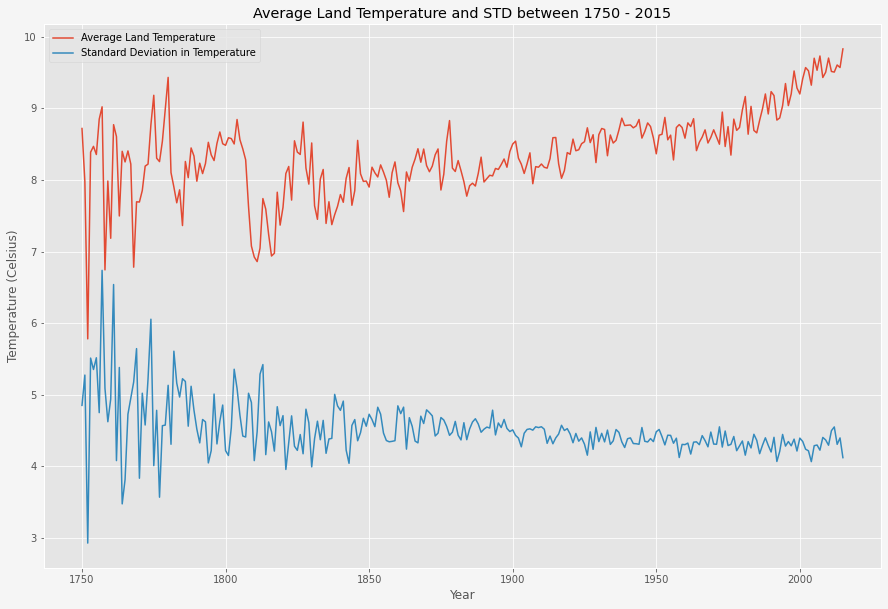

In [10]:
plt.figure(figsize= (15,10), facecolor= ('whitesmoke'))
std_grouped = d1.groupby([times.year]).std()
plt.plot(grouped['LandAverageTemperature'])
plt.plot(std_grouped['LandAverageTemperature'])
plt.title('Average Land Temperature and STD between 1750 - 2015')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Average Land Temperature', 'Standard Deviation in Temperature'])
plt.show()

The earliest and most recent annual temperatures:

In [11]:
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [12]:
grouped.tail()

,LandAverageTemperature
dt,
2011,9.516000
2012,9.507333
2013,9.606500
2014,9.570667
2015,9.831000


Technological advances enabled more accurate and precise temperature measurements, which led to decreasing uncertainties.

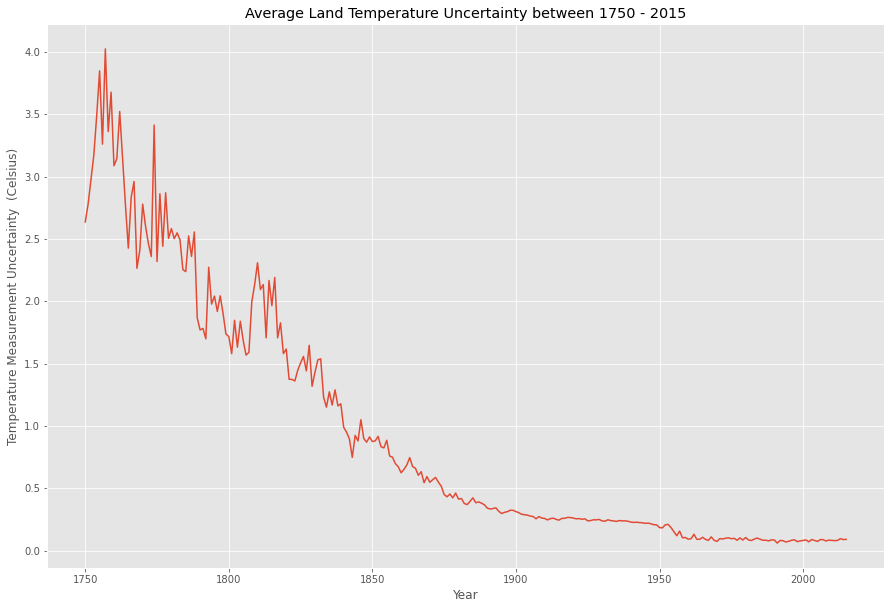

In [13]:
d2 = dataFrame[['dt', 'LandAverageTemperatureUncertainty']]
uncertainty_group = d2.groupby([times.year]).mean()
plt.figure(figsize= (15,10))
plt.plot(uncertainty_group['LandAverageTemperatureUncertainty'])
plt.title('Average Land Temperature Uncertainty between 1750 - 2015')
plt.xlabel('Year')
plt.ylabel('Temperature Measurement Uncertainty  (Celsius)')
plt.show()

In [14]:
d1['LandAverageTemperature']= d1['LandAverageTemperature'].fillna(method='ffill')

In [15]:
# Display coldest and warmest times
min_max_df = dataFrame[['dt', 'LandMaxTemperature', 'LandMinTemperature']]
warmest_time_idx = min_max_df['LandMaxTemperature'].idxmax()
warmest_time = min_max_df.loc[warmest_time_idx]['dt']
max_temp = min_max_df['LandMaxTemperature'].max()
print('Highest temperature recorded: %.3f celsius in %s %s' % (max_temp, months[int(warmest_time.split('-')[1])-1], warmest_time[:4]))

coldest_time_idx = min_max_df['LandMinTemperature'].idxmin()
coldest_time = min_max_df.loc[coldest_time_idx]['dt']
min_temp = min_max_df['LandMinTemperature'].min()
print('Lowest temperature recorded: %.3f celsius in %s %s' % (min_temp, months[int(coldest_time.split('-')[1])-1], coldest_time[:4]))
print('Temperature range: %.3f celsius' % (max_temp-min_temp))
# Display coldest and warmest years
warmest_year = grouped['LandAverageTemperature'].idxmax()
max_avg_temp = grouped.loc[warmest_year]['LandAverageTemperature']
print('\nWarmest year -> %s : %.3f celsius' % (warmest_year, max_avg_temp))


coldest_year = grouped['LandAverageTemperature'].idxmin()
min_avg_temp = grouped.loc[coldest_year]['LandAverageTemperature']
print('Coldest year -> %s : %.3f celsius' % (coldest_year, min_avg_temp))

Highest temperature recorded: 21.320 celsius in Jul 2011
Lowest temperature recorded: -5.407 celsius in Jan 1857
Temperature range: 26.727 celsius

Warmest year -> 2015 : 9.831 celsius
Coldest year -> 1752 : 5.780 celsius


Even though the highest temperature recorded was in July 2011, 2015 was the warmest year as the highest average temperature was recorded in 2015. This hints towards global warming. Also, the lowest temperature was recorded in 1857, but the coldest year was 1752 as the lowest average temperature was recorded in 1752.

In [16]:
# Histogram of temperatures grouped by month - of 1750, 2015 and average of all the years
# Draw the year's average temperature line
first_year_df = d1[:12]
first_year_df = first_year_df.assign(month=pd.Series(months))
first_year_df.set_index("month",drop=True,inplace=True)
first_year_df.rename(columns={'LandAverageTemperature': 'avg_temp_first'}, inplace=True)

final_year_df = d1[-12:]
final_year_df.index = list(range(12))
final_year_df = final_year_df.assign(month=pd.Series(months))
final_year_df.set_index("month",drop=True,inplace=True)
final_year_df.rename(columns={'LandAverageTemperature': 'avg_temp_final'}, inplace=True)

frames = [first_year_df, final_year_df]
temp_variation = pd.concat(frames, axis=1)
temp_variation['diff'] = temp_variation['avg_temp_final'] - temp_variation['avg_temp_first']
temp_variation

,dt,avg_temp_first,dt,avg_temp_final,diff
month,,,,,
Jan,1750-01-01,3.034,2015-01-01,3.881,0.847
Feb,1750-02-01,3.083,2015-02-01,4.664,1.581
Mar,1750-03-01,5.626,2015-03-01,6.740,1.114
Apr,1750-04-01,8.490,2015-04-01,9.313,0.823
May,1750-05-01,11.573,2015-05-01,12.312,0.739
Jun,1750-06-01,12.937,2015-06-01,14.505,1.568
Jul,1750-07-01,15.868,2015-07-01,15.051,-0.817
Aug,1750-08-01,14.750,2015-08-01,14.755,0.005
Sep,1750-09-01,11.413,2015-09-01,12.999,1.586


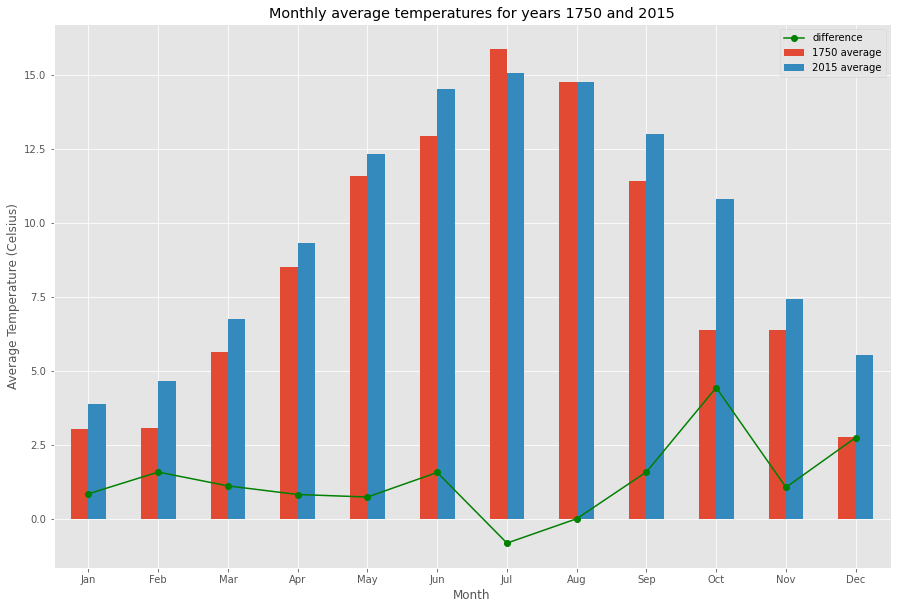

In [17]:
ax = plt.figure(figsize=(15,10)).gca()
temp_variation.plot(kind='bar', y=['avg_temp_first', 'avg_temp_final'], ax=ax)
temp_variation.plot(kind='line', y=['diff'], style='go-', ax=ax)
plt.title('Monthly average temperatures for years 1750 and 2015')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.legend(['difference', '1750 average', '2015 average'])
plt.show()

As inferred from the above bar chart, most of the 2015 months are warmer compared to 1750 months, suggesting increasing warmth over time. We can also observe that the temperature difference between 1750 and 2015 is highest in October and lowest in August. Furthermore, the July 1750 temperature is higher than the July 2015 temperature, thereby defying the norm followed by other months.

In [18]:
month_avg_group = d1.groupby([times.month]).mean()
month_avg_group.index = list(range(12))
month_avg_group = month_avg_group.assign(month=pd.Series(months))
month_avg_group.set_index("month",drop=True,inplace=True)

month_avg_group

,LandAverageTemperature
month,
Jan,2.275211
Feb,2.951695
Mar,4.956872
Apr,8.248688
May,11.129102
Jun,13.324323
Jul,14.283259
Aug,13.739406
Sep,11.710169


In [19]:
warmest_month = month_avg_group['LandAverageTemperature'].idxmax()
coldest_month = month_avg_group['LandAverageTemperature'].idxmin()

print('Warmest month throughout the years -> %s : %.3f celsius average temperature' % (warmest_month, month_avg_group.loc[warmest_month]['LandAverageTemperature']))
print('Coldest month throughout the years -> %s : %.3f celsius average temperature' % (coldest_month, month_avg_group.loc[coldest_month]['LandAverageTemperature']))

Warmest month throughout the years -> Jul : 14.283 celsius average temperature
Coldest month throughout the years -> Jan : 2.275 celsius average temperature


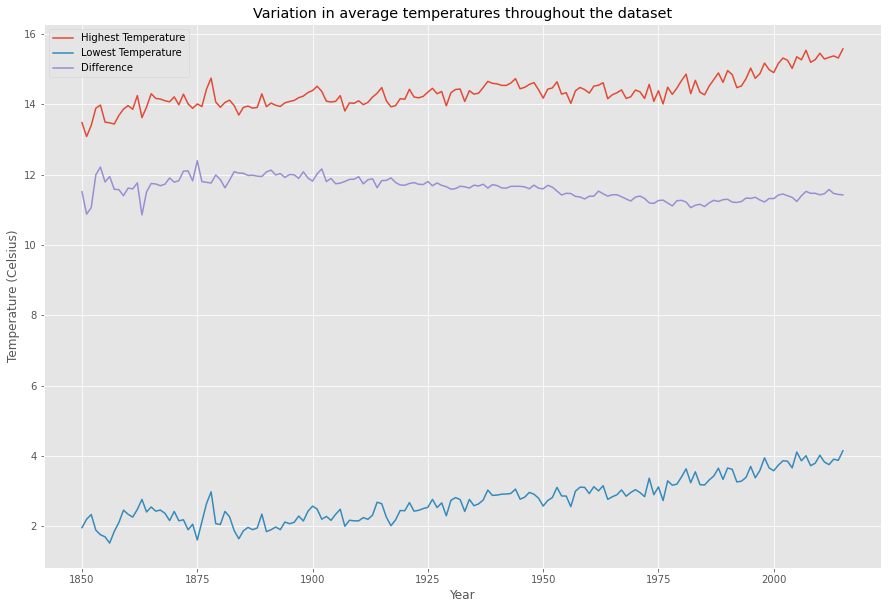

In [20]:
# plot variation in temperature throughout the years
# First, data preprocessing to group min, max, diff data
# Group by year
yearly_var_group = min_max_df.groupby([times.year]).mean()
yearly_var_group.rename(columns={'LandMaxTemperature': 'max_avg_temp'}, inplace=True)
yearly_var_group.rename(columns={'LandMinTemperature': 'min_avg_temp'}, inplace=True)

yearly_var_group['diff'] = yearly_var_group['max_avg_temp'] - yearly_var_group['min_avg_temp']

ax = plt.figure(figsize=(15,10)).gca()
yearly_var_group.plot(y=['max_avg_temp', 'min_avg_temp', 'diff'], ax=ax)
plt.title('Variation in average temperatures throughout the dataset')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Highest Temperature', 'Lowest Temperature', 'Difference'])
plt.show()

We can see that, in recent years, both the highest and the lowest temperatures show a rise, while there is a slight decrese in the temperature difference.

In [22]:
# Which month shows the highest variation?
month_var_group = min_max_df.groupby([times.month]).mean()
#month_var_group = month_max_group.drop('dt', axis=1)
month_var_group.rename(columns={'LandMaxTemperature': 'max_temp'}, inplace=True)
month_var_group.rename(columns={'LandMinTemperature': 'min_temp'}, inplace=True)

month_var_group.index = list(range(12))

month_var_group = month_var_group.assign(month=pd.Series(months))
month_var_group.set_index("month",drop=True,inplace=True)
month_var_group['diff'] = month_var_group['max_temp'] - month_var_group['min_temp']
month_var_group

,max_temp,min_temp,diff
month,,,
Jan,8.178657,-2.934572,11.113229
Feb,8.921410,-2.672711,11.594120
Mar,11.137169,-0.866500,12.003669
Apr,14.290331,2.247699,12.042633
May,17.133729,5.179536,11.954193
Jun,19.226663,7.407331,11.819331
Jul,20.070217,8.423861,11.646355
Aug,19.646892,7.960934,11.685958
Sep,17.831620,6.138301,11.693319


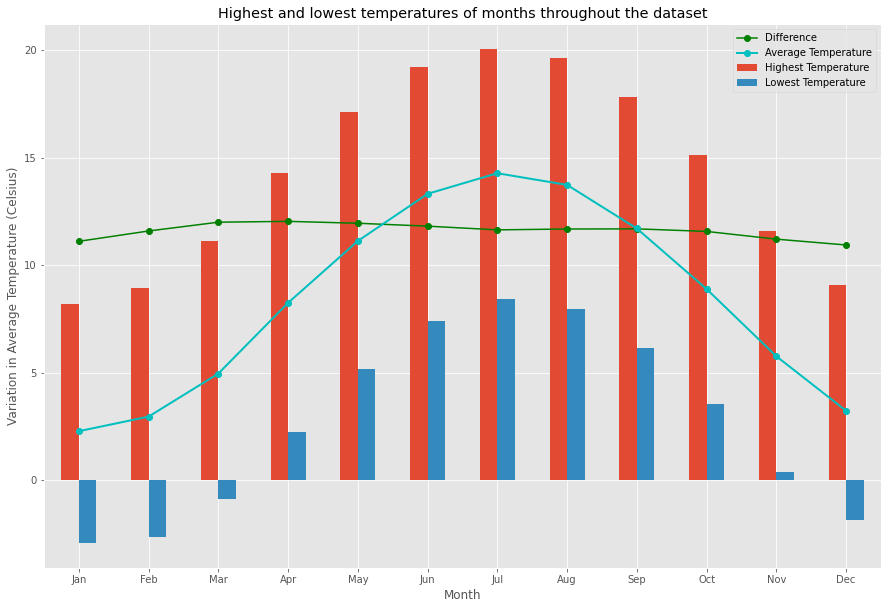

In [23]:
# Plot the results

ax = plt.figure(figsize=(15,10)).gca()
month_var_group.plot(kind='bar', y=['max_temp', 'min_temp'], ax=ax)
month_var_group.plot(kind='line', y=['diff'], style='go-', ax=ax)
month_avg_group.plot(kind='line', style='co-', linewidth=2.0, ax=ax)
plt.title('Highest and lowest temperatures of months throughout the dataset')
plt.xlabel('Month')
plt.ylabel('Variation in Average Temperature (Celsius)')
plt.legend(['Difference', 'Average Temperature', 'Highest Temperature', 'Lowest Temperature'])
plt.show()

Thus, we observe that the temperature difference remains essentially constant throughout the year.

In [24]:
print('Mean temperature difference: %.3f celsius' % (month_var_group['diff'].mean()))

Mean temperature difference: 11.607 celsius
